In [1]:
import os
import json
import time
import torch
import pprint
import random
import pandas
import argparse
import lightning


import numpy as np
import mdtraj as md
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from torch.utils.data import Dataset

# Load

In [7]:
molecule = "alanine"
temperature = "1200.0"
date = "24-11-14"
time = "14:08"
state = "c5"

In [3]:
simulation_dir = f"../log/{molecule}/{temperature}/{date}/{time}"

In [4]:
scalars = pandas.read_csv(f"{simulation_dir}/scalars.csv", usecols=[1])

In [6]:
scalars

,Potential Energy (kJ/mole)
0,-88.063308
1,-88.000452
2,-87.842748
3,-87.648681
4,-87.444863
...,...
999995,169.031119
999996,176.119120
999997,182.617307
999998,187.255181


In [11]:
pdb_file = f"../data/{molecule}-stable/{state}.pdb"
loaded_traj = md.load(
	f"{simulation_dir}/traj.dcd",
	top=pdb_file
)

In [23]:
phi_list = md.compute_phi(loaded_traj)[1].squeeze(1)
psi_list = md.compute_psi(loaded_traj)[1].squeeze(1)
phi_list.shape
phi_list.shape

(1000000,)

<Figure size 640x480 with 0 Axes>

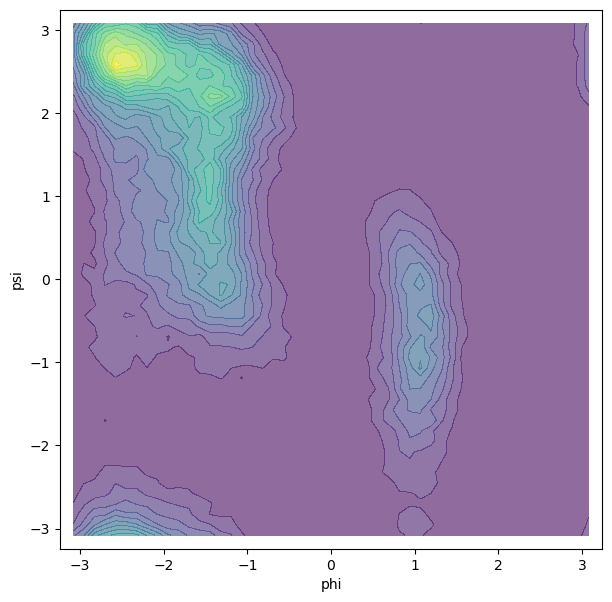

In [24]:
plt.clf()
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

hist, xedges, yedges = np.histogram2d(phi_list, psi_list, bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])

# Compute the centers of the bins
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2

# Plot the contour
X, Y = np.meshgrid(xcenters, ycenters)
ax.contourf(X, Y, hist.T, levels=20, cmap='viridis', alpha=0.6)

# Plot start and goal states
# ax.scatter(phi_start, psi_start, edgecolors="black", c="w", zorder=101, s=160)
# ax.scatter(phi_goal, psi_goal, edgecolors="black", c="w", zorder=101, s=500, marker="*")

# Plot the Ramachandran plot
plt.xlim([-np.pi - 0.1, np.pi + 0.1])
plt.ylim([-np.pi - 0.1, np.pi + 0.1])
plt.xlabel("phi")
plt.ylabel("psi")
plt.show()